# Tabla de contenido

* [1 Cargar los datos](#1)
* [2 Preparar los datos](#2)
    * [2.1 Reemplazar los nombres de las columnas](#2.1)
    * [2.2 Relleno de datos ausentes](#2.2)
        * [2.2.1 Relleno de datos en la columna name y genre](#2.2.1)
        * [2.2.2 Relleno de datos en la columna year_release](#2.2.2)
        * [2.2.3 Relleno de datos en la columna user_score](#2.2.3)
        * [2.2.4 Relleno de datos en la columna critic_score](#2.2.4)
        * [2.2.5 Relleno de datos en la columna rating](#2.2.5)
    * [2.3 Calcular las ventas globales](#2.3)
* [3 Analizar los datos](#3)
    * [3.1 Calcular el número de juegos lanzados por año](#3.1)
    * [3.2 Variaciones de ventas por plataforma](#3.2)
        * [3.2.1 Filtro por las principales 6 plataformas](#3.2.1)
    * [3.3 Definiendo la data para el año de referencia 2017](#3.3)
    * [3.4 Diagramas de caja de las ventas por cada plataforma](#3.4)
    * [3.5 Análisis entre las reseñas de usuarios y criticas con las ventas](#3.5)
    * [3.6 Comparación de ventas por juego entre plataformas](#3.6)
    * [3.7 Distribución de los juegos por género](#3.7)    
* [4 Estudio](#4)
    * [4.1 Determinar las 5 principales plataformas por cada región](#4.1)
        * [4.1.1 Estudio de las 5 plataformas de la región NA](#4.1.1)
        * [4.1.2 Estudio de las 5 plataformas de la región EU](#4.1.2)
        * [4.1.3 Estudio de las 5 plataformas de la región JP](#4.1.3)
        * [4.1.4 Estudio de las cuotas de mercado de las diversas plataformas](#4.1.4)
    * [4.2 Determinar las 5 principales generos por cada región](#4.2)
        * [4.2.1 Estudio de los 5 genéros de la región NA](#4.2.1)
        * [4.2.2 Estudio de los 5 genéros de la región EU](#4.2.2)
        * [4.2.3 Estudio de los 5 genéros de la región JP](#4.2.3)
        * [4.2.4 Estudio de las cuotas de mercado de las diversas regiones](#4.2.4)
    * [4.3 Determinar las 5 principales clasificaciones por cada región](#4.3)
        * [4.3.1 Estudio de las 5 clasificaciones de la región NA](#4.3.1)
        * [4.3.2 Estudio de las 5 clasificaciones de la región EU](#4.3.2)
        * [4.3.3 Estudio de las 5 clasificaciones de la región JP](#4.3.3)
        * [4.3.4 Estudio de las cuotas de mercado de las diversas clasificaciones](#4.3.4)
* [5 Probar las hipótesis estadísticas](#5)
    * [5.1 El promedio de los usuarios de las plataformas Xbox One y PC es la misma](#5.1)
    * [5.2 El promedio de los usuarios al jugar géneros de Acción y Deportes es diferente](#5.2)
* [6 Conclusiones](#6)


## Cargar los datos

In [1]:
# cargamos todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

!pip install sidetable
import sidetable as stb
from scipy import stats as st


In [2]:
# cargamos el dataset

df = pd.read_csv('/datasets/games.csv')

In [3]:
# imprimimos la información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Nota:**

* Tenemos un dataframe con un total de 11 columnas y 16715 filas.
* Existen columnas con valores ausentes, las cuales son: Name, Genre, Year_Of_Release, Critic_Score, User_Score y Rating.
* Se procederá a poner todas las columnas en minúsculas, y cambiarle el nombre a Year_of_Release, así como su tipo.


## Preparar los datos

### Reemplazar los nombres de las columnas 

In [6]:
# llevamos a todas las columnas a letra minúscula

df = df.rename(columns = str.lower)
df.columns = df.columns.str.replace('year_of_release', 'year_release')
df. head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Relleno de datos ausentes

In [7]:
# utilizamos este procedimiento 

df.stb.missing()

,missing,total,percent
critic_score,8578,16715,51.319174
rating,6766,16715,40.478612
user_score,6701,16715,40.089740
year_release,269,16715,1.609333
name,2,16715,0.011965
genre,2,16715,0.011965
platform,0,16715,0.000000
na_sales,0,16715,0.000000
eu_sales,0,16715,0.000000
jp_sales,0,16715,0.000000


#### Relleno de datos en la columna name y genre

In [25]:
df.query('name.isna()')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [26]:
df['name'].fillna('unknow', inplace = True)
df['name'].isna().sum()

0

In [27]:
df.query('genre.isna()')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknow,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknow,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [28]:
df['genre'].fillna('unknow', inplace = True)
df['genre'].isna().sum()

0

In [29]:
df.query("name == 'unknow'")

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknow,GEN,1993.0,unknow,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknow,GEN,1993.0,unknow,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Relleno de datos en la columna year_release

In [30]:
df.query('year_release.isna()')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
df.query('name.str.contains("\d{4}", regex = True) and year_release.isna()')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [32]:
def get_year(row):
    lolo = '\d{4}'
    match = re.findall(lolo, row)
    for i in match:
        if 1950 < int(i) < 2017:
            return int(i) - 1

In [33]:
get_year('Madden NFL 2004')


2003

In [34]:
df.loc[df.year_release.isna(), 'year_release'] = df.loc[:, 'name'].apply(get_year)
df['year_release'].isna().sum()

252

In [35]:
df.query('name == "Football Manager 2007" | name == "Sega Rally 2006"')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13929,Sega Rally 2006,PS2,2005.0,Racing,0.0,0.00,0.04,0.0,NaN,NaN,NaN
16079,Football Manager 2007,X360,2006.0,Sports,0.0,0.01,0.00,0.0,NaN,NaN,NaN


In [36]:
df.loc[df.year_release.isna(), 'year_release'] = df.groupby('name')['year_release'].transform('median')
df['year_release'].isna().sum()


139

In [37]:
df.loc[df.year_release.isnull(), 'year_release'] = df.groupby(['platform'])['year_release'].transform('median')
df['year_release'].isna().sum()

0

In [38]:
df.loc[:, 'year_release'] = pd.to_datetime(df.loc[:, 'year_release'], format = '%Y').dt.year
df.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Relleno de datos en la columna user_score

In [8]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.6       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
len(df.query('user_score == "tbd"'))

0

In [10]:
df['user_score'] = df['user_score'].astype('float64')

df["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [12]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Relleno de datos en la columna critic_score

In [13]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [14]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Nota:**
Se procedió a dejar los datos nulos en las columnas user_score y critic_score


####  Relleno de datos en la columna rating


In [19]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [20]:
df['rating'].isna().sum()

6766

In [39]:
from scipy.stats import mode

pivot_rating = df.pivot_table(index = 'name', values = 'rating', aggfunc = (lambda x:mode(x).mode[0]))

def fill_rating(row):
    name = row['name']
    rating = row['rating']
    
    if pd.isna(rating):
        return pivot_rating.loc[name]['rating']
    return rating

df['rating'] = df.apply(fill_rating, axis = 1)


In [40]:
df['rating'].isna().sum()

0

In [41]:
df['rating'].value_counts()

0       6329
E       4147
T       3094
M       1654
E10+    1472
EC        10
RP         4
K-A        4
AO         1
Name: rating, dtype: int64

### Calcular las ventas globales

In [42]:
column_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df.loc[:, column_sales].sum(axis = 1)
df.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


In [43]:
df.duplicated().sum()

0

**Nota:**

* Se procedió a realizar el relleno de valores ausentes en las columnas anteriormente mencionadas.
* No se visualizaron valores duplicados.
* Se creó una nueva columna llamada total_sales, que es la sumatoria global de todas las ventas.

## Analizar los datos

### Calcular el número de juegos lanzados por año

In [44]:
# agrupamos la información

game_count_per_year = df.groupby('year_release').agg(count = ('name', 'count')).reset_index()
game_count_per_year

,year_release,count
0,1980,9
1,1981,46
2,1982,52
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


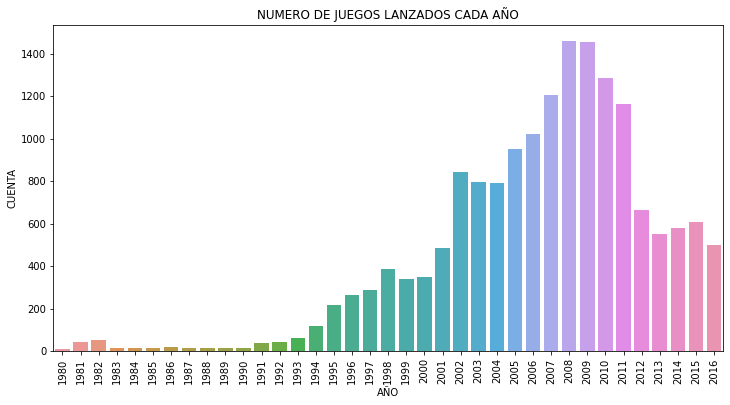

In [45]:
# mostramos en un gráfico de barras la información estudiada

plt.figure(figsize = (12, 6))
ax = sns.barplot(data = game_count_per_year, x = 'year_release', y = 'count')
ax.set_xlabel('AÑO')
ax.set_ylabel('CUENTA')
ax.set_title('NUMERO DE JUEGOS LANZADOS CADA AÑO')
plt.xticks(rotation = 90)
plt.show()

### Variaciones de ventas por plataforma

In [46]:
# agrupamos la información

platform_game_sales = df.groupby('platform').agg(total_sales = ('total_sales', 'sum'), 
                                                 median = ('total_sales', 'median'),
                                                 mean = ('total_sales', 'mean'), 
                                                 count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
platform_game_sales

,platform,total_sales,median,mean,count
0,PS2,1255.77,0.230,0.581106,2161
1,X360,971.42,0.280,0.769746,1262
2,PS3,939.65,0.270,0.705973,1331
3,Wii,907.51,0.190,0.687508,1320
4,DS,806.12,0.110,0.374765,2151
5,PS,730.86,0.260,0.610576,1197
6,GBA,317.85,0.160,0.386679,822
7,PS4,314.14,0.200,0.801378,392
8,PSP,294.05,0.090,0.243218,1209
9,PC,259.52,0.050,0.266448,974


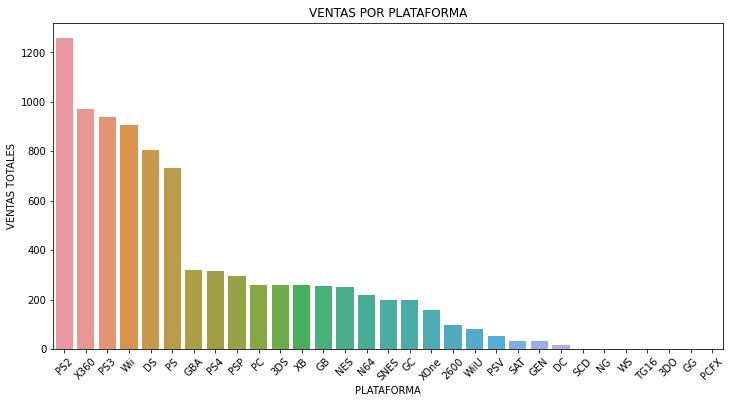

In [47]:
# mostramos en un gráfico de barras la información estudiada

plt.figure(figsize = (12, 6))
ax = sns.barplot(data = platform_game_sales, x = 'platform', y = 'total_sales')
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks(rotation = 45)
plt.show()

#### Filtro por las principales 6 plataformas

In [48]:
# filtramos a raíz de las ventas por plataforma

top_platform = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP']

df_top_platform = df.query('platform in @top_platform').reset_index(drop = True)
df_top_platform.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [49]:
df_top_platform.shape

(9434, 12)

In [50]:
# agrupamos la información

top_platform_sales_year = df_top_platform.groupby(['platform', 'year_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                                   median = ('total_sales', 'median'),
                                                                                   mean = ('total_sales', 'mean'),
                                                                                   count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
top_platform_sales_year

,platform,year_release,total_sales,median,mean,count
0,PS2,2004,217.93,0.310,0.783921,278
1,Wii,2009,211.17,0.190,0.613866,344
2,PS2,2002,208.76,0.295,0.729930,286
3,PS2,2003,193.05,0.370,0.748256,258
4,Wii,2008,177.68,0.215,0.621259,286
...,...,...,...,...,...,...
65,PSP,2014,0.24,0.010,0.024000,10
66,PS3,2005,0.19,0.190,0.190000,1
67,Wii,2016,0.18,0.180,0.180000,1
68,PSP,2015,0.12,0.020,0.040000,3


In [51]:
df_top_platform['year_release'].sort_values().unique()

array([1985, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [52]:
top_platform_sales_year = df_top_platform.groupby(['platform', 'year_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                                    median = ('total_sales', 'median'),
                                                                                    mean = ('total_sales', 'mean'),
                                                                                    count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()

top_platform_unique = df_top_platform['year_release'].sort_values().unique()
top_platform_unique

array([1985, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

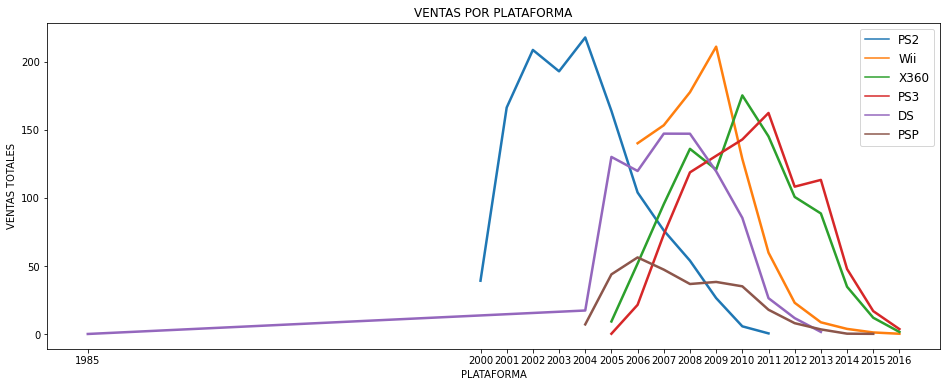

In [53]:
plt.figure(figsize = (16, 6))
ax = sns.lineplot(data = top_platform_sales_year, x = 'year_release', y = 'total_sales', hue = 'platform', lw = 2.5)
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks(top_platform_unique)
plt.legend(fontsize = 'large')
plt.show()

### Definiendo la data para el año de referencia 2017

In [55]:
# filtramos los juegos que fueron lanzados en el 2013 y después

df_recent = df.query('year_release >= 2013').reset_index(drop = True)
df_recent.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,0,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [56]:
df_recent_pivot = df_recent.groupby(['platform', 'year_release']).agg(total_sales = ('total_sales', 'sum'),
                                                                      median = ('total_sales', 'median'),
                                                                      mean = ('total_sales', 'mean'),
                                                                      count = ('name', 'count')).reset_index()
            
df_recent_pivot             

,platform,year_release,total_sales,median,mean,count
0,3DS,2013,57.04,0.095,0.594167,96
1,3DS,2014,43.76,0.090,0.547000,80
2,3DS,2015,27.78,0.090,0.323023,86
3,3DS,2016,15.14,0.080,0.329130,46
4,DS,2013,1.54,0.150,0.192500,8
5,PC,2013,12.66,0.175,0.316500,40
6,PC,2014,13.28,0.100,0.282553,47
7,PC,2015,8.52,0.080,0.170400,50
8,PC,2016,5.25,0.035,0.097222,54
9,PS3,2013,113.25,0.310,0.898810,126


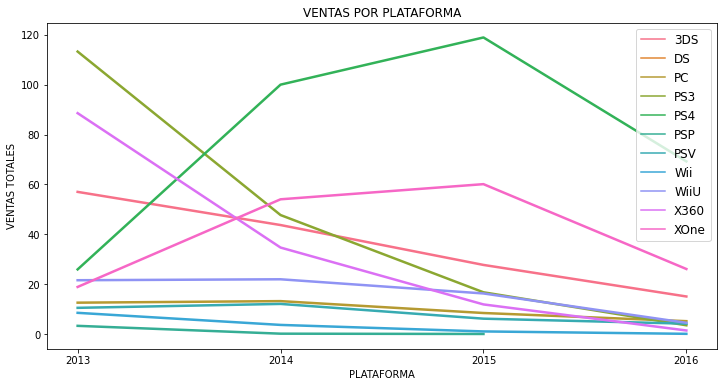

In [57]:
# graficamos con la información estudiada

plt.figure(figsize = (12, 6))
ax = sns.lineplot(data = df_recent_pivot, x = 'year_release', y = 'total_sales', hue = 'platform', lw = 2.5)
ax.set_xlabel('PLATAFORMA')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR PLATAFORMA')
plt.xticks([2013, 2014, 2015, 2016])
plt.legend(fontsize = 'large')
plt.show()

### Diagramas de caja de las ventas por cada plataforma

In [58]:
platform_recent_sales = df_recent.groupby('platform').agg(total_sales = ('total_sales', 'sum'),
                                                          median = ('total_sales', 'median'),
                                                          mean = ('total_sales', 'mean'),
                                                          count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
                                                          
platform_recent_sales           

,platform,total_sales,median,mean,count
0,PS4,314.14,0.200,0.801378,392
1,PS3,181.43,0.150,0.525884,345
2,XOne,159.32,0.220,0.645020,247
3,3DS,143.72,0.090,0.466623,308
4,X360,136.80,0.265,0.735484,186
5,WiiU,64.63,0.200,0.562000,115
6,PC,39.71,0.080,0.207906,191
7,PSV,33.25,0.040,0.092618,359
8,Wii,13.66,0.180,0.593913,23
9,PSP,3.74,0.020,0.055000,68


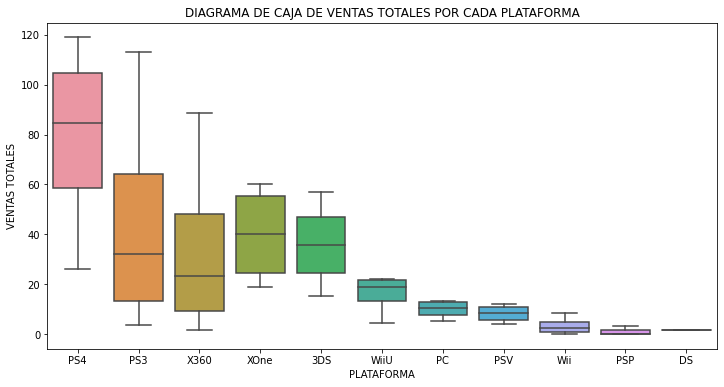

In [59]:
df_recent_pivot = df_recent_pivot.sort_values(by = 'total_sales', ascending = False)

plt.figure(figsize = (12, 6))
sns.boxplot(data = df_recent_pivot, x = 'platform', y = 'total_sales')
plt.xlabel('PLATAFORMA')
plt.ylabel('VENTAS TOTALES')
plt.title('DIAGRAMA DE CAJA DE VENTAS TOTALES POR CADA PLATAFORMA')
plt.show()

### Análisis entre las reseñas de usuarios y criticas con las ventas

In [60]:
# estudiamos la relación entre las reseñas de usuarios y criticas con las ventas filtrando el dataset, haber si existe una correlación

df_ps4 = df_recent.query('platform == "PS4"').reset_index(drop = True)
df_ps4.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [61]:
df_ps4.shape

(392, 12)

In [62]:
sales_review_corr = df_ps4[['total_sales', 'critic_score', 'user_score']]
sales_review_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000



CORRELACION ENTRE critic_score Y VENTAS : 0.40656790206178095


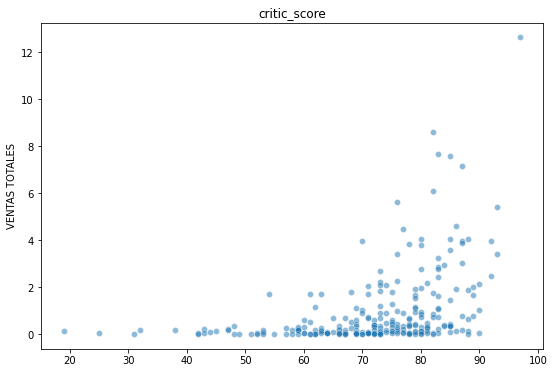



CORRELACION ENTRE user_score Y VENTAS : -0.031957110204556424


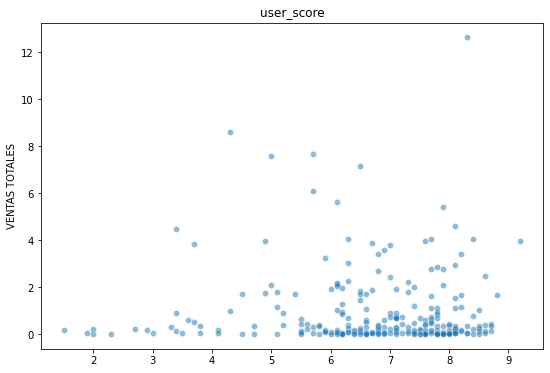

In [63]:
review = ['critic_score', 'user_score']

for column in review:
    print()
    print('CORRELACION ENTRE', column, 'Y VENTAS', ':', df_ps4[column].corr(df_ps4['total_sales']))
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = df_ps4[column], y = df_ps4['total_sales'], data = df_ps4, alpha = 0.5)
    plt.xlabel('')
    plt.ylabel('VENTAS TOTALES')
    plt.title(column)
    plt.show()
    print()

### Comparación de ventas por juego entre plataformas

In [64]:
# estudiamos las principales plataformas y filtramos

top_console = ['PS4', 'PS3', 'X360', 'XONE', '3DS']

df_top_platform_recent = df_recent.query('platform in @top_console').reset_index(drop = True)
df_top_platform_recent.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,0,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [65]:
df_top_platform_recent.shape

(1231, 12)

In [66]:
cross_platform_sales = df_top_platform_recent.pivot_table(values = 'total_sales', index = 'name', columns = 'platform', aggfunc = 'sum').sort_values(by = 'PS3', ascending = False).dropna()

cross_platform_sales

platform,3DS,PS3,PS4,X360
name,,,,
FIFA 14,0.23,6.46,3.01,4.22
FIFA 15,0.46,4.28,6.08,2.92
LEGO Marvel Super Heroes,0.89,1.83,1.62,2.22
Skylanders SWAP Force,0.24,1.02,0.38,1.32
The LEGO Movie Videogame,0.69,0.93,0.67,1.27
LEGO Jurassic World,0.62,0.85,0.90,0.87
Lego Batman 3: Beyond Gotham,0.45,0.73,0.92,0.89
Skylanders: Trap Team,0.28,0.67,0.44,0.89
LEGO The Hobbit,0.24,0.46,0.60,0.45


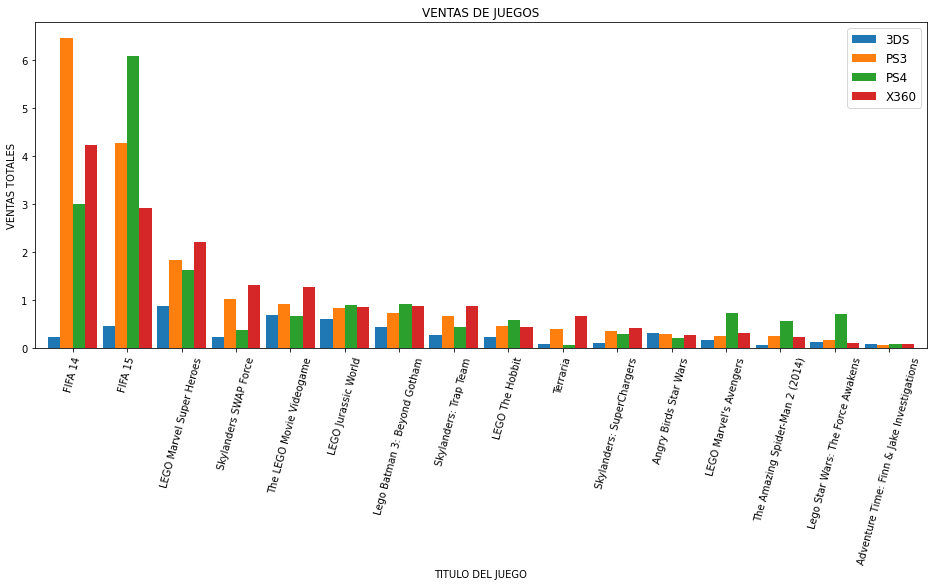

In [67]:
cross_platform_sales.plot(kind = 'bar', figsize = (16, 6), width = 0.9)
plt.xlabel('TITULO DEL JUEGO')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS DE JUEGOS')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 75)
plt.show()

### Distribución de los juegos por género

In [68]:
# estudiamos la distribución agrupando por género

df_genre_recent = df_recent.groupby('genre').agg(total_sales = ('total_sales', 'sum'),
                                                 median = ('total_sales', 'median'),
                                                 mean = ('total_sales', 'mean'),
                                                 count = ('name', 'count')).sort_values(by = 'total_sales', ascending = False).reset_index()
                                                
df_genre_recent                                                
                                                
                                                
                                                

,genre,total_sales,median,mean,count
0,Action,322.15,0.110,0.419466,768
1,Shooter,233.05,0.445,1.239628,188
2,Sports,150.65,0.240,0.703972,214
3,Role-Playing,146.18,0.125,0.497211,294
4,Misc,63.06,0.105,0.404231,156
5,Platform,42.63,0.225,0.576081,74
6,Racing,39.98,0.115,0.464884,86
7,Fighting,35.31,0.125,0.441375,80
8,Adventure,23.73,0.030,0.096463,246
9,Simulation,21.95,0.100,0.348413,63


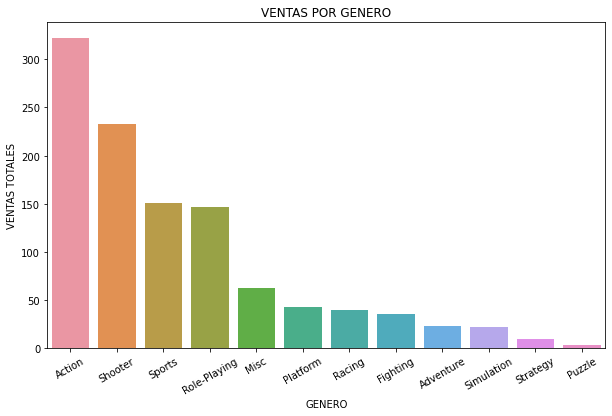

In [69]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = df_genre_recent, x = 'genre', y = 'total_sales')
ax.set_xlabel('GENERO')
ax.set_ylabel('VENTAS TOTALES')
ax.set_title('VENTAS POR GENERO')
plt.xticks(rotation = 30)
plt.show()

**Conclusiones Intermedias:**

Se realizaron estos análisis:

* Calcular el número de juegos lanzados por año:

Se puede observar que comienzan a verse las ventas en el año de 1980, siendo en el año de 1991 cuando empienzan a incrementar las ventas hasta llegar a un pico en los años 2008 y 2009, cuando empiezan a decaer.

* Variaciones de ventas por plataforma

Acá se pudo observar que las plataformas que mas tuvieron ventas fueron la PS2, XBOX360, PS3, WII, DS Y PS.


* Definiendo la data para el año de referencia 2017

Se utilizo un filtro con la informacion de la columna year_release igual o posterior al 2013. Siendo la consola de PS4 la mas vendia, seguida por la PS3 y despues sus competidoras, la XBOX360 Y XBOXONE

* Diagramas de caja de las ventas por cada plataforma

Acá utilizando el diagrama de caja como herramienta, se visualizó que despues de las plataformas que nombramos anteriormente, la 3DS y la WiiU son las que les siguen entre ventas totales en el año 2013 y después.

* Análisis entre las reseñas de usuarios y criticas con las ventas

Con respecto a las reseñas de usuarios y criticas y su correlacion con las ventas, no tuvieron mucha repercusió.

* Comparación de ventas por juego entre plataformas

Acá se pudo ver que para el juego de ps3, el mas vendido fue fifa 14, mientras que para el ps4 fie fifa 15. Para XBOX360 también fue fifa 14 y para 3DS fue Lego Marvel Super Heroes. Recordando las graficas donde las ventas han ido mermando desde el 2009.

* Distribución de los juegos por género

Se pudo visualizar que los juegos por genero que mas se vendieron fueron: acción, disparos, deportes, juegos de rol y clásicos.

## Estudio

In [71]:
# mostramos una muestra del dataset nuevo

df_recent.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,0,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Determinar las 5 principales plataformas por cada región

#### Estudio de las 5 plataformas de la región NA

In [72]:
# filtramos las plataformas por la region NA

na_top_platform = df_recent.groupby('platform').agg(na_sales = ('na_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    na_median = ('na_sales', 'median'),
                                                    na_mean = ('na_sales', 'mean'),
                                                    na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_platform.head()

,platform,na_sales,total_sales,na_median,na_mean,na_count
0,PS4,108.74,314.14,0.06,0.277398,392
1,XOne,93.12,159.32,0.12,0.377004,247
2,X360,81.66,136.80,0.15,0.439032,186
3,PS3,63.50,181.43,0.03,0.184058,345
4,3DS,38.58,143.72,0.00,0.125260,308


#### Estudio de las 5 plataformas de la región EU

In [73]:
# filtramos las plataformas por la region EU

eu_top_platform = df_recent.groupby('platform').agg(eu_sales = ('eu_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    eu_median = ('eu_sales', 'median'),
                                                    eu_mean = ('eu_sales', 'mean'),
                                                    eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_platform.head()

,platform,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,PS4,141.09,314.14,0.08,0.359923,392
1,PS3,67.81,181.43,0.02,0.196551,345
2,XOne,51.59,159.32,0.07,0.208866,247
3,X360,42.52,136.80,0.08,0.228602,186
4,3DS,30.98,143.72,0.00,0.100584,308


#### Estudio de las 5 plataformas de la región JP

In [74]:
# filtramos las plataformas por la region JP

jp_top_platform = df_recent.groupby('platform').agg(jp_sales = ('jp_sales', 'sum'),
                                                    total_sales = ('total_sales', 'sum'),
                                                    jp_median = ('jp_sales', 'median'),
                                                    jp_mean = ('jp_sales', 'mean'),
                                                    jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_platform.head()

,platform,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,3DS,67.84,143.72,0.055,0.220260,308
1,PS3,23.35,181.43,0.030,0.067681,345
2,PSV,18.66,33.25,0.030,0.051978,359
3,PS4,15.96,314.14,0.010,0.040714,392
4,WiiU,10.88,64.63,0.000,0.094609,115


#### Estudio de las cuotas de mercado de las diversas plataformas

In [75]:
# creamos una tabla que muestra las cuotas de mercado de las diversas plataformas

top_platform_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'platform', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()

top_platform_share

,platform,eu_sales,jp_sales,na_sales
0,PS4,141.09,15.96,108.74
1,XOne,51.59,0.34,93.12
2,X360,42.52,0.51,81.66
3,PS3,67.81,23.35,63.50
4,3DS,30.98,67.84,38.58
5,WiiU,19.85,10.88,29.21
6,PC,25.59,0.00,11.13
7,Wii,5.93,0.05,6.56
8,PSV,6.15,18.66,5.15
9,DS,0.85,0.00,0.57


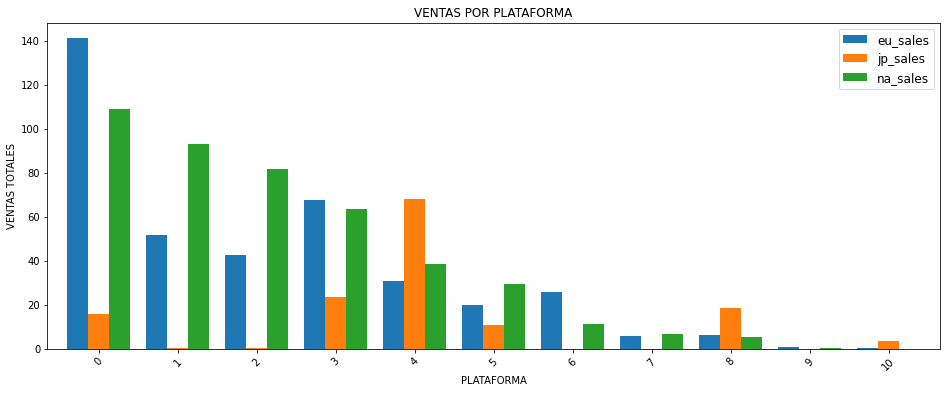

In [76]:
# creamos un diagrama de barra con loa información estudiada anteriormente

top_platform_share.plot(kind = 'bar', figsize = (16, 6), width = 0.8)
plt.xlabel('PLATAFORMA')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR PLATAFORMA')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

### Determinar las 5 principales generos por cada región

#### Estudio de los 5 genéros de la región NA

In [77]:
# filtramos los géneros por la región NA

na_top_genre = df_recent.groupby('genre').agg(na_sales = ('na_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              na_median = ('na_sales', 'median'), 
                                              na_mean = ('na_sales', 'mean'), 
                                              na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_genre.head()

,genre,na_sales,total_sales,na_median,na_mean,na_count
0,Action,126.07,322.15,0.02,0.164154,768
1,Shooter,109.78,233.05,0.20,0.583936,188
2,Sports,65.27,150.65,0.08,0.305000,214
3,Role-Playing,46.51,146.18,0.02,0.158197,294
4,Misc,27.49,63.06,0.01,0.176218,156


#### Estudio de los 5 genéros de la región EU

In [78]:
# filtramos los géneros por la región EU

eu_top_genre = df_recent.groupby('genre').agg(eu_sales = ('eu_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              eu_median = ('eu_sales', 'median'), 
                                              eu_mean = ('eu_sales', 'mean'), 
                                              eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_genre.head()

,genre,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,Action,118.36,322.15,0.020,0.154115,768
1,Shooter,87.88,233.05,0.185,0.467447,188
2,Sports,60.52,150.65,0.050,0.282804,214
3,Role-Playing,37.02,146.18,0.010,0.125918,294
4,Racing,20.19,39.98,0.055,0.234767,86


#### Estudio de los 5 genéros de la región JP

In [79]:
# filtramos los géneros por la región JP

jp_top_genre = df_recent.groupby('genre').agg(jp_sales = ('jp_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              jp_median = ('jp_sales', 'median'), 
                                              jp_mean = ('jp_sales', 'mean'), 
                                              jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_genre.head()

,genre,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,Role-Playing,51.14,146.18,0.05,0.173946,294
1,Action,40.49,322.15,0.01,0.052721,768
2,Misc,9.44,63.06,0.02,0.060513,156
3,Fighting,7.65,35.31,0.03,0.095625,80
4,Shooter,6.61,233.05,0.00,0.035160,188


#### Estudio de las cuotas de mercado de las diversas regiones

In [80]:
# creamos una tabla que muestra las cuotas de mercado de los diversos géneros

top_genre_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'genre', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()


top_genre_share

,genre,eu_sales,jp_sales,na_sales
0,Action,118.36,40.49,126.07
1,Shooter,87.88,6.61,109.78
2,Sports,60.52,5.41,65.27
3,Role-Playing,37.02,51.14,46.51
4,Misc,20.04,9.44,27.49
5,Platform,15.58,4.79,18.14
6,Fighting,8.55,7.65,15.55
7,Racing,20.19,2.30,13.04
8,Adventure,8.25,5.82,7.22
9,Simulation,10.92,4.52,5.04


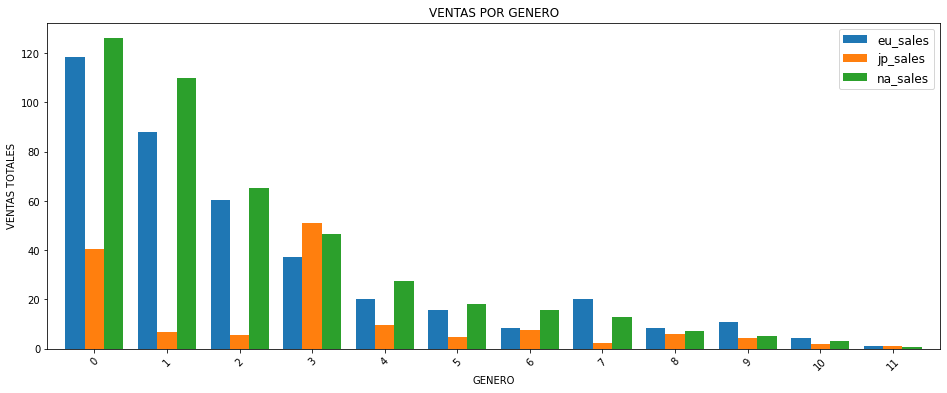

In [81]:
# creamos un diagrama de barra con loa información estudiada anteriormente

top_genre_share.plot(kind = 'bar', figsize = (16 , 6), width = 0.8)
plt.xlabel('GENERO')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR GENERO')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

### Determinar las 5 principales clasificaciones por cada región

#### Estudio de las 5 clasificaciones de la región NA

In [82]:
# filtramos las clasificaciones por la región NA

na_top_rating = df_recent.groupby('rating').agg(na_sales = ('na_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              na_median = ('na_sales', 'median'), 
                                              na_mean = ('na_sales', 'mean'), 
                                              na_count = ('name', 'count')).sort_values(by = 'na_sales', ascending = False).reset_index()

na_top_rating.head()

,rating,na_sales,total_sales,na_median,na_mean,na_count
0,M,175.12,397.81,0.12,0.413995,423
1,E,81.78,206.41,0.05,0.257170,318
2,0,72.54,232.53,0.00,0.084941,854
3,E10+,56.51,121.26,0.11,0.210074,269
4,T,52.27,133.93,0.03,0.138280,378


#### Estudio de las 5 clasificaciones de la región EU

In [83]:
# filtramos las clasificaciones por la región EU

eu_top_rating = df_recent.groupby('rating').agg(eu_sales = ('eu_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              eu_median = ('eu_sales', 'median'), 
                                              eu_mean = ('eu_sales', 'mean'), 
                                              eu_count = ('name', 'count')).sort_values(by = 'eu_sales', ascending = False).reset_index()

eu_top_rating.head()

,rating,eu_sales,total_sales,eu_median,eu_mean,eu_count
0,M,156.90,397.81,0.12,0.370922,423
1,E,85.46,206.41,0.05,0.268742,318
2,0,61.19,232.53,0.00,0.071651,854
3,E10+,45.25,121.26,0.10,0.168216,269
4,T,43.73,133.93,0.03,0.115688,378


#### Estudio de las 5 clasificaciones de la región JP

In [84]:
# filtramos las clasificaciones por la región JP

jp_top_rating= df_recent.groupby('rating').agg(jp_sales = ('jp_sales', 'sum'), 
                                              total_sales = ('total_sales', 'sum'), 
                                              jp_median = ('jp_sales', 'median'), 
                                              jp_mean = ('jp_sales', 'mean'), 
                                              jp_count = ('name', 'count')).sort_values(by = 'jp_sales', ascending = False).reset_index()

jp_top_rating.head()

,rating,jp_sales,total_sales,jp_median,jp_mean,jp_count
0,0,80.85,232.53,0.03,0.094672,854
1,T,22.91,133.93,0.02,0.060608,378
2,E,15.98,206.41,0.00,0.050252,318
3,M,15.11,397.81,0.00,0.035721,423
4,E10+,6.27,121.26,0.00,0.023309,269


#### Estudio de las cuotas de mercado de las diversas clasificaciones

In [85]:
# creamos una tabla que muestra las cuotas de mercado de las diversas clasificaciones

top_rating_share = df_recent.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'rating', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()

top_rating_share

,rating,eu_sales,jp_sales,na_sales
0,M,156.90,15.11,175.12
1,E,85.46,15.98,81.78
2,0,61.19,80.85,72.54
3,E10+,45.25,6.27,56.51
4,T,43.73,22.91,52.27


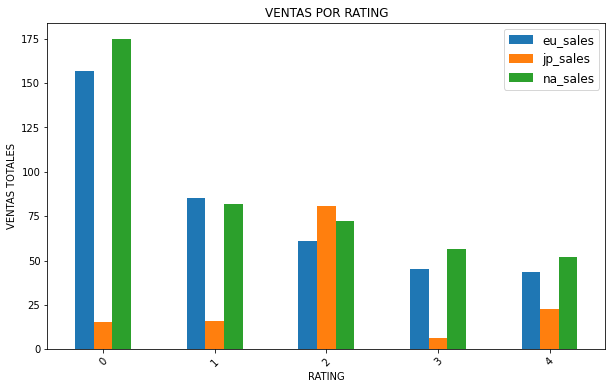

In [86]:
# creamos un diagrama de barra con loa información estudiada anteriormente

top_rating_share.plot(kind = 'bar', figsize = (10 , 6))
plt.xlabel('RATING')
plt.ylabel('VENTAS TOTALES')
plt.title('VENTAS POR RATING')
plt.legend(fontsize = 'large')
plt.xticks(rotation = 45)
plt.show()

**Conclusiones Intermedias:**

Se realizaron estos estudios:

* Determinar las 5 principales plataformas por cada región

Acá, la plataforma PS4 fue la más vendida es las regiones NA Y EU, mientras que la 3DS fue en JP.

* Determinar las 5 principales generos por cada región

Cuando se trata de géneros, los más vendidos en NA y EU fueron los de acción, mientras que en JP fueron los juegos de Rol.

* Determinar las 5 principales clasificaciones por cada región

Las clasificaciones que más se vendieron en NA Y EU fueron M, mientras que en JP podemos comentar que fue T.
    

## Probar las hipótesis estadísticas

### El promedio de los usuarios de las plataformas Xbox One y PC es la misma

**Hipótesis:**
    
Ho: El promedio de los usuarios de las plataformas Xbox One y Pc es la misma.
H1: El promedio de los usuarios de las plataformas Xbox One y Pc es diferente.
    
Usamos un valor alpha del 5%.

In [91]:
# filtramos el dataset por las plataformas

df_recent_xone = df_recent.query('platform == "XOne"').reset_index(drop = True)
df_recent_pc = df_recent.query('platform == "PC"').reset_index(drop = True)

In [92]:
# creamos una función para mostrar las distribuciones

def hisplot (a, b, c):
    plt.figure(figsize = (10, 10))
    sns.histplot(a[b], bins = 30, kde = True)
    plt.xlabel(b)
    plt.ylabel('JUEGO')
    plt.title(c)
    plt.show()

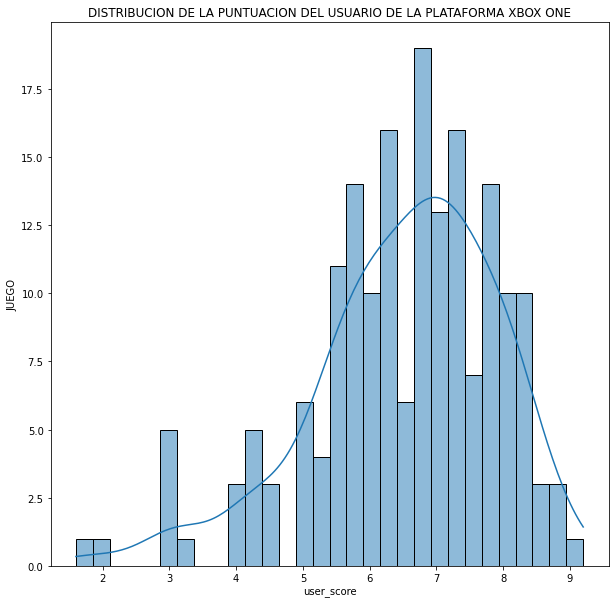

In [93]:
# estudiamos la distribución de la plataforma Xbox One

hisplot(df_recent_xone, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DE LA PLATAFORMA XBOX ONE')

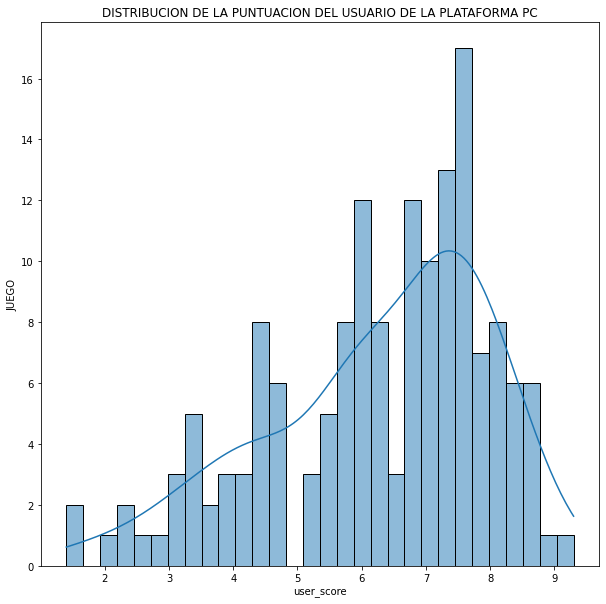

In [94]:
# estudiamos la distribución de la plataforma PC

hisplot(df_recent_pc, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DE LA PLATAFORMA PC')

In [95]:
# utilizamos el test de Levene para determinar si usamos equal_var en True o False

platform_var_levene = st.levene(df_recent_xone['user_score'], df_recent_pc['user_score'], center = 'median')
platform_var_levene

LeveneResult(statistic=nan, pvalue=nan)

In [96]:
# procedemos con los cálculos

alpha = 0.05
results = st.ttest_ind(df_recent_xone['user_score'], df_recent_pc['user_score'], equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('RECHAZAMOS LA HIPOTESIS NULA')
else:
    print('NO RECHAZAMOS LA HIPOTESIS NULA')

p-value: nan
NO RECHAZAMOS LA HIPOTESIS NULA


### El promedio de los usuarios al jugar géneros de Acción y Deportes es diferente

**Hipótesis:**
    
Ho: El promedio de los usuarios de los géneros de acción y deportes es la misma.
H1: El promedio de los usuarios de los géneros de acción y deportes es diferente.
    
Usamos un valor alpha del 5%.

In [97]:
# filtramos el dataset por los géneros

df_recent_action = df_recent.query('genre == "Action"').reset_index(drop = True)
df_recent_sports = df_recent.query('genre == "Sports"').reset_index(drop = True)

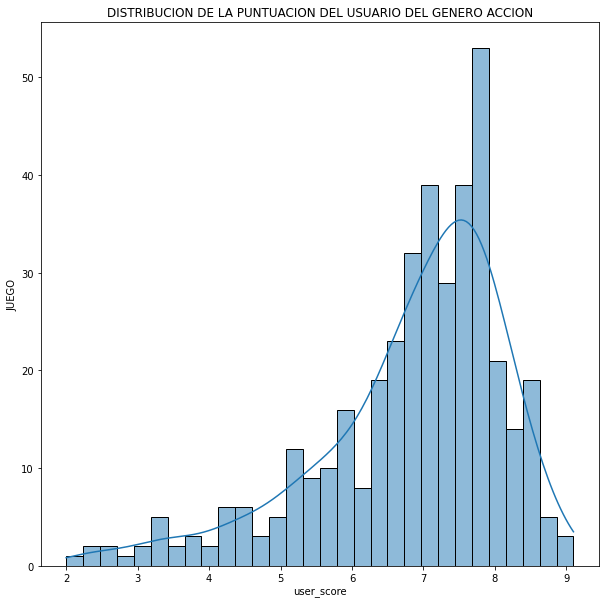

In [98]:
# estudiamos la distribución del género acción

hisplot(df_recent_action, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DEL GENERO ACCION')

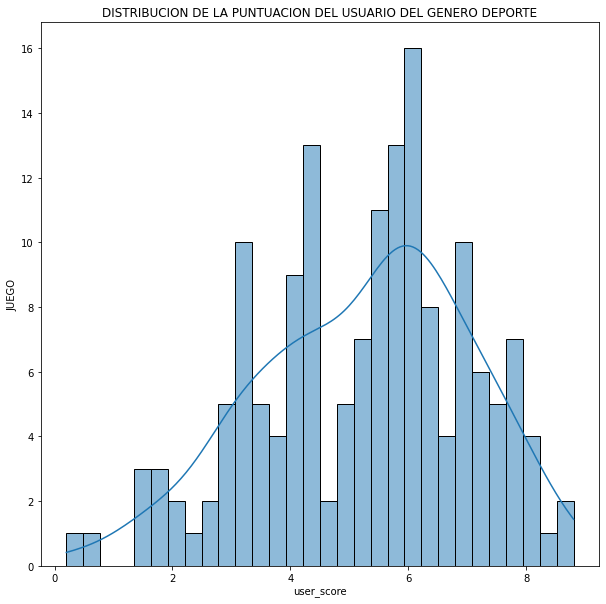

In [99]:
# estudiamos la distribución del género deporte

hisplot(df_recent_sports, 'user_score', 'DISTRIBUCION DE LA PUNTUACION DEL USUARIO DEL GENERO DEPORTE')

In [102]:
# de igual manera, aplicamos el test de Levene para determinar si usamos equal_var False o True

genre_var_levene = st.levene(df_recent_action['user_score'], df_recent_sports['user_score'], center = 'median')
genre_var_levene

LeveneResult(statistic=nan, pvalue=nan)

In [104]:
# procedemos con los cálculos

alpha = 0.05
results = st.ttest_ind(df_recent_action['user_score'], df_recent_sports['user_score'], equal_var = True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('RECHAZAMOS LA HIPOTESIS NULA')
else:
    print('NO RECHAZAMOS LA HIPOTESIS NULA')

p-value: nan
NO RECHAZAMOS LA HIPOTESIS NULA


In [ ]:
<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>

Se realizaron las siguientes pruebas de hipótesis:
    
* El promedio de los usuarios de las plataformas Xbox One y PC es la misma:
    
La primera hipótesis revela que el promedio de user_score entre las plataformas de Xbox One y PC es la misma. Las plataformas no afectan lo que opina o decide el usuario sobre el juego.

* El promedio de los usuarios al jugar géneros de Acción y Deportes es diferente:
    
</div>

## Conclusiones

**Cargar los datos**

* Trabajamos con un dataset de 16715 filas y 11 columnas.
* Al rellenar los datos, trabajamos con las columnas: genre, name, year_release, critic_score, user_score y rating.
* Cambiamos los nombres de las columnas a minúsculas para trabajar más cómodo.
* Cambiamos el tipo de la columna year_release a uno más adecuado.
* No se consiguieron datos duplicados.

**Preparar los datos**

* Creamos una nueva columna, total_sales, que muestra información de las ventas totales en todo el mundo.
* Se filtraron los datos del 2013 para predecir las ventas del año 2017.

**Análisis de los datos**

* En el rango de 1980 y 1994, se lanzaron muy pocos juegos debido a la falta de plataformas. En los años 2005 y 2011 hubo un crecimiento en el lanzamiento de los juegos, pero después del 2011 bajó. El motivo principal es el abandono de las antiguas plataformas por el avance de las nuevas plataformas, que ofrecen mejores desempeños tecnológicos.

* Estudiamos a las 6 principales plataformas, las cuales son: ps2, xbox, ps3, wii, ds y ps. 

* Se pudo visualizar que desde el 2013 la plataforma mas vendida es ps4, luego ps3 y xbox360. Asimismo, existe una vida media de las plataformas que es de 10 años y sus ventas comienzan a disminuir después de los 5 años de haber salido al mercado. 

* Los datos de critic_score y user_score no afectan significativamente en las ventas.

* Los 5 géneros que más se venden son: acción, deportes, clásico, de rol y disparos.

**Estudio de los datos**

* Cabe destacar que para las regiones de Norteamérica y Europa, las paltaformas que más usan son ps4, XOne, X360 y ps3; mientras que para Japón utilizan más la plataforma 3ds.

* En las región de Japón, se ve que los usuarios en mayoría están en la categoría de Teen/13+, mientras que las regiones de NA y EU son de Mature/17+.

**Prueba de las hipótesis**

* La primera hipótesis revela que el promedio de user_score entre las plataformas de Xbox One y PC es la misma. Las plataformas no afectan lo que opina o decide el usuario sobre el juego.

* La segunda hipótesis muestra que el promedio de user_score entre los géneros de acción y disparos es diferente. Da a entender que el género de un juego afecta en lo que opina o decide un usuario sobre el juego.
